# Lab Instructions

You are working as an analyst for a consulting agency that has been hired to study and improve productivity at a mid-sized company.  Morale is very low and, after speaking with employees, several common complaints kept coming up:

* New employees complained that more tenured employees were lazy and unproductive.
* More tenured employees complained that the newer employees didn't focus and were therefore unproductive.
* Managers were worried that remote workers might be less productive.
* In-person employees found it impossible to focus and be productive when their desk was in the open plan area.
* Many people said they had so much administrative work to do they could only be truly productive if they worked overtime.
* Everyone complained that there were too many meetings.

The consulting agency carefully collected data on a number of factors including number of years at the company, focus (higher is better), productivity (higher is better), department, meetings per week, and desk location can be found in Employee_productivity.csv.

1. Determine which feature - years at the company, hours worked, or focus - has the strongest linear relationship with productivity.  Show a visualization and calculate R-squared for all three relationships to justify your answer.

2. Build on that linear regression model to determine what other featuers also impact productivity. Using both visualzations and R-squared values, build a model that can predicts employee productivity at this company. Evaluate each feature in the dataset.

3. Write a short (a few sentences) summary of how the different factors in the data relate to employee productivity.  What recommendations would you make so that employees can be as productive as possible?



# 3.3 — Visualizing Relationships Between Two Quantitative Features

In [137]:
# Import needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Employee_productivity.csv")
df.head()

,HoursWorked,FocusScore,ProductivityScore,Department,YearsAtCompany,TeamMeetingsPerWeek,DeskLocation
0,42.4,6.3,3127.96,Engineering,17,0,Open Plan
1,34.0,7.2,4742.60,HR,8,6,Private Office
2,47.2,5.6,2044.73,Sales,15,3,Remote
3,38.4,9.0,5818.92,HR,5,6,Private Office
4,36.4,2.5,1841.31,Sales,9,6,Remote


# Scatterplots for each feature vs Productivity
We will compare:
- Years at Company
- Hours Worked
- Focus Score

against Productivity Score.

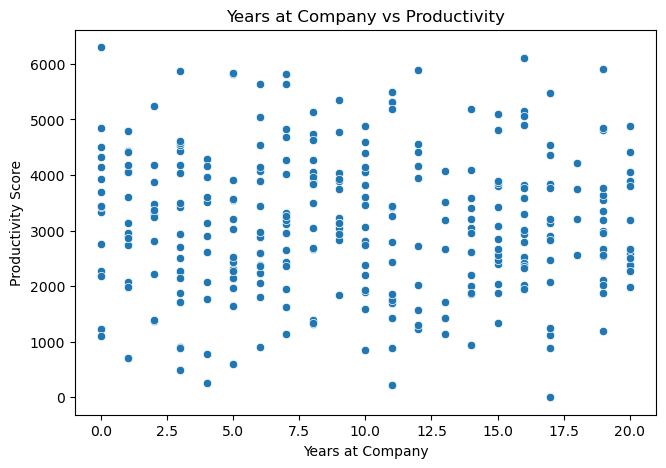

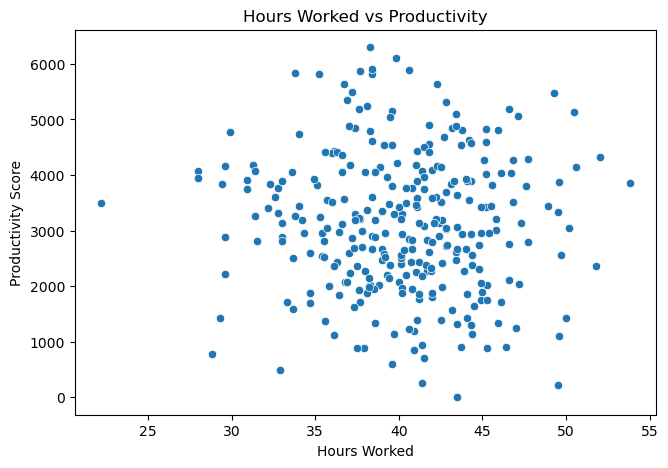

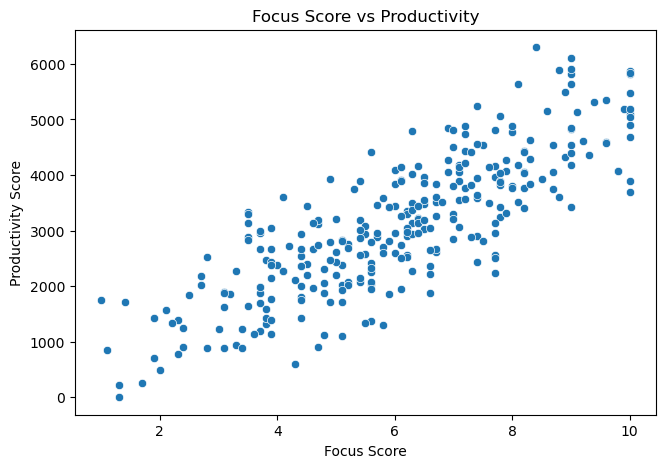

In [140]:
# Scatterplot: Years at Company vs Productivity
sns.scatterplot(x="YearsAtCompany", y="ProductivityScore", data=df)
plt.title("Years at Company vs Productivity")
plt.xlabel("Years at Company")
plt.ylabel("Productivity Score")
plt.show()

# Scatterplot: Hours Worked vs Productivity
sns.scatterplot(x="HoursWorked", y="ProductivityScore", data=df)
plt.title("Hours Worked vs Productivity")
plt.xlabel("Hours Worked")
plt.ylabel("Productivity Score")
plt.show()

# Scatterplot: Focus Score vs Productivity
sns.scatterplot(x="FocusScore", y="ProductivityScore", data=df)
plt.title("Focus Score vs Productivity")
plt.xlabel("Focus Score")
plt.ylabel("Productivity Score")
plt.show()

# Linear Regression

In [143]:
# Years at Company vs Productivity
X = sm.add_constant(df["YearsAtCompany"])
y = df["ProductivityScore"]
model_years = sm.OLS(y, X).fit()
r2_years = model_years.rsquared

# Hours Worked vs Productivity
X = sm.add_constant(df["HoursWorked"])
model_hours = sm.OLS(y, X).fit()
r2_hours = model_hours.rsquared

# Focus Score vs Productivity
X = sm.add_constant(df["FocusScore"])
model_focus = sm.OLS(y, X).fit()
r2_focus = model_focus.rsquared

print("R² values:")
print("Years at Company:", round(r2_years, 3))
print("Hours Worked:", round(r2_hours, 3))
print("Focus Score:", round(r2_focus, 3))

R² values:
Years at Company: 0.0
Hours Worked: 0.003
Focus Score: 0.678


# Multiple Regression

# Why Multiple Regression?

So far, we looked at each feature by itself (simple linear regression).  
Now we add several predictors together in a multiple regression model.  
This helps us see how all the factors combined (years, hours, focus, meetings) explain productivity.

In [146]:
X = df[["YearsAtCompany", "HoursWorked", "FocusScore", "TeamMeetingsPerWeek"]]
X = sm.add_constant(X)
y = df["ProductivityScore"]

multi_model = sm.OLS(y, X).fit()
multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ProductivityScore   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     155.8
Date:                Mon, 22 Sep 2025   Prob (F-statistic):           1.83e-71
Time:                        00:09:33   Log-Likelihood:                -2393.8
No. Observations:                 300   AIC:                             4798.
Df Residuals:                     295   BIC:                             4816.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 141.9005    390.827      0.363      0.717    -627.263     911.064
YearsAtCompany          2.7596      6.945      0.397      0.691     -10.909      16.428
HoursWorked            -3.5928      8.483     -0.424      0.672     -20.287      13.101
FocusScore            500.1073     20.937     23.886      0.000     458.902     541.313
TeamMeetingsPerWeek    19.7534     24.717      0.799      0.425     -28.891      68.398
==============================================================================
Omnibus:                        0.479   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.787   Jarque-Bera (JB):                0.607
Skew:                           0.067   Prob(JB):                        0.738
Kurtosis:                       2.825   Cond. No.                         401.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Interpretation
- The scatterplots give us a first look at trends.
- The R² values show which single factor explains productivity the most.
- The multiple regression shows how all factors together predict productivity.

# Summary
From the R² values, focus score had the strongest connection with productivity.  
Years at the company and hours worked didn’t explain as much.  
When we added everything together in the multiple regression, focus still mattered most, and too many meetings seemed to hurt productivity.  

# Recommendation
The company should help employees stay focused and cut down on meetings. Working extra hours or just staying longer at the company doesn’t seem to help as much.